# SONIC model - Implementation of sonophore membrane coverage

### Goal

Implement a "hybrid" active node consisting of a morphological section partially covered by sonophores.

### Proposition
We define 2 separate Hodgkin-Huxley differential systems within the node:
- An **"amplitude modulated" (AM) system** for the fraction of membrane covered by sonophores ($f_s$)
- A **standard (S) system** for the rest of the membrane ($1\ -\ f_s$)

A given membrane current is then computed as a weighted average of the 2 systems:
$$i_{ion} = f_s \cdot g_{ion, AM} (\frac{Q_m}{C_{m, AM}} - E_{ion}) + (1 - f_s) \cdot g_{ion, S} (\frac{Q_m}{C_{m, S}} - E_{ion})$$


### Imports

In [1]:
import sys
import logging
import numpy as np
import matplotlib.pyplot as plt

from PySONIC.utils import logger, si_format
from PySONIC.neurons import *
from ExSONIC._1D import runPlotAStim, SeriesConnector

logger.setLevel(logging.INFO)

### Parameters

In [2]:
# Model parameters
neuron = CorticalRS()
a = 32e-9  # sonophore diameter (m)
fs = 1.0
Ra = 1e2  # default order of magnitude found in litterature (Ohm.cm)
d = 1e-6  # order of magnitude of axon node diameter (m)
L = 1e-5  # between length order of magnitude of axon node (1 um) and internode (100 um - 1 mm)

# Stimulation parameters
Fdrive = 500e3  # Hz
Adrive = 100e3  # Pa
tstim = 150e-3  # s
toffset = 100e-3  # s
PRF = 100.  # Hz
DC = 1.

connector = SeriesConnector(vref='Vmeff_{}'.format(neuron.name))

## Influence of sonophore membrane coverage
### Single compartment

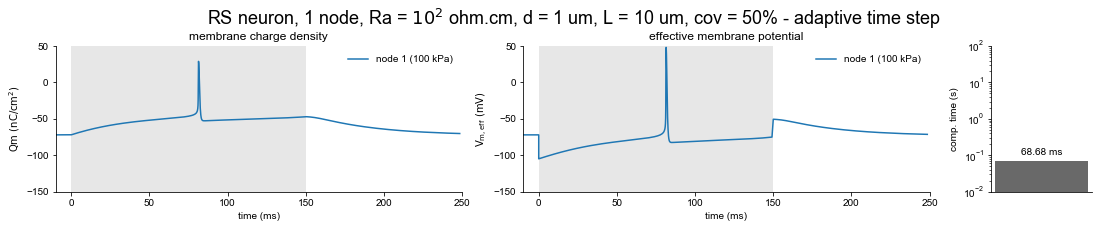

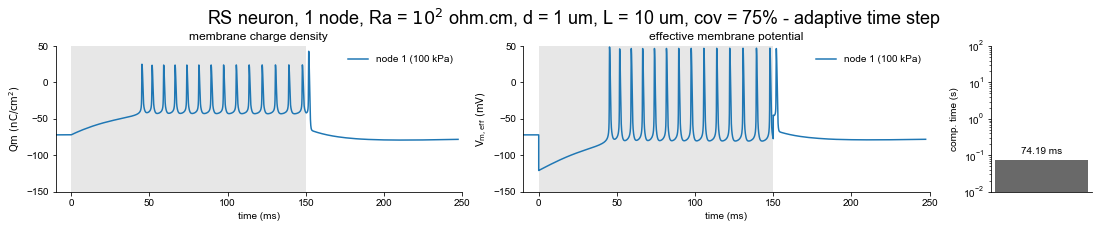

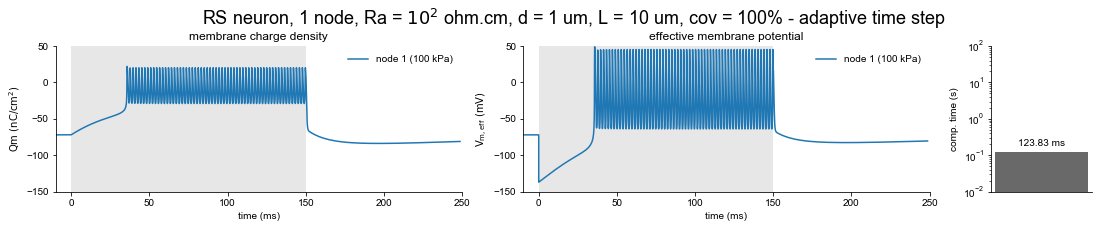

In [15]:
for fs_range in np.linspace(0.5, 1.0, 3):
    fig = runPlotAStim(neuron, a, Fdrive, Ra, connector, d, L, Adrive, tstim, toffset, PRF, DC, nnodes=1, covs=fs_range)

Expectedly, the fraction of sonophore coverage plays a huge influence on the US neural response at 100 kPa:
- below 50% coverage: **no response**
- above 50% coverage: **increasing neural response** with progressive **modulation of spikes shape** (reduction of charge exploration range especially during repolarization)

Hence, the **effects of augmenting membrane sonophore coverage are very similar to that of increasing acoustic amplitude**.

### Extended model - sonication of node 1 only

R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2
R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2
R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2


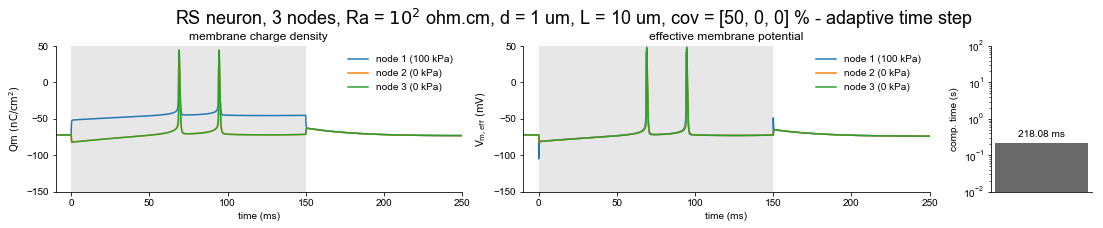

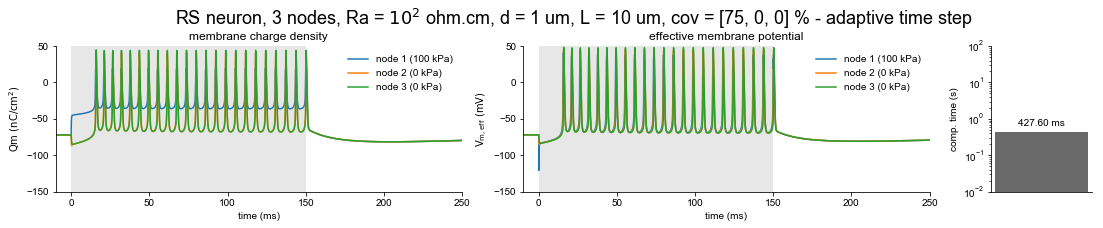

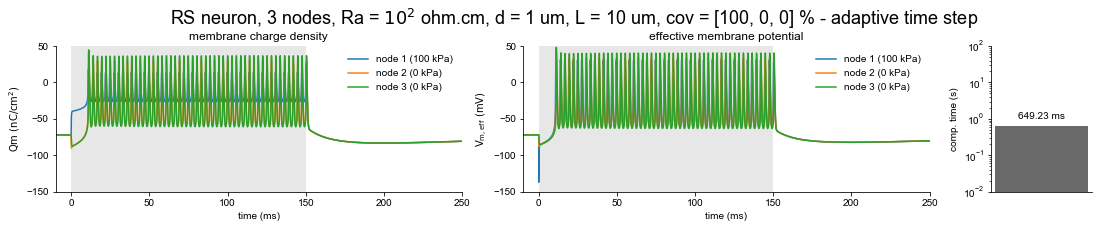

In [14]:
nnodes = 3
for fs_range in np.linspace(0.5, 1.0, 3):
    fig = runPlotAStim(neuron, a, Fdrive, Ra, connector, d, L, Adrive, tstim, toffset, PRF, DC, nnodes=nnodes, covs=[fs_range] + [0.] * (nnodes - 1))

With only one sonicated node, the neural response is just a combination of the effects of an increasing membrane coverage at node 1 with an axial conduction towards the neighboring nodes.

### Extended model - uniform sonication, decreasing membrane coverage

R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2
R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2
R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2


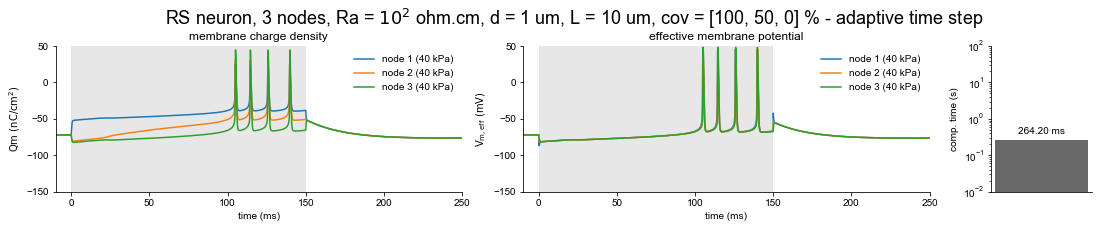

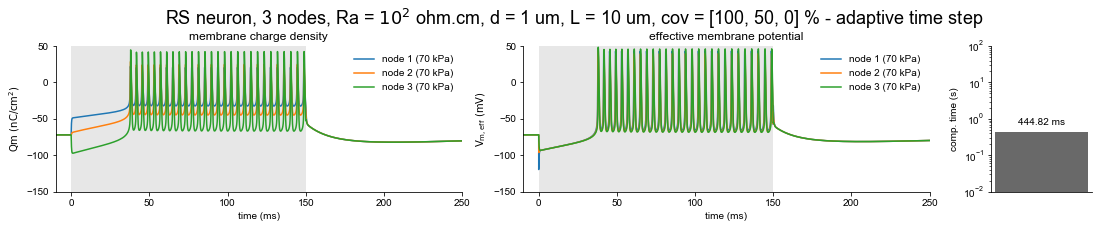

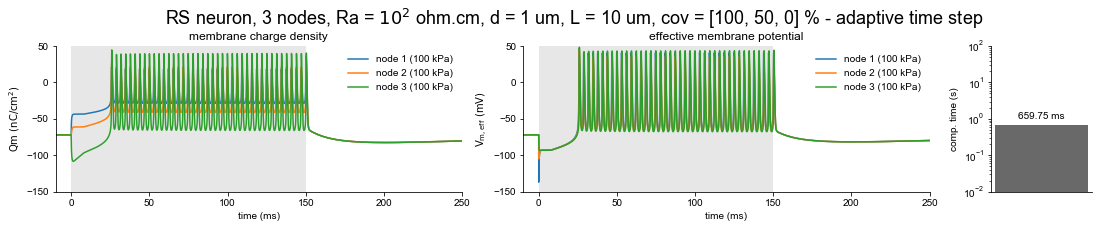

In [31]:
nnodes = 3
for A_range in np.linspace(40e3, 100e3, 3):
    fig = runPlotAStim(neuron, a, Fdrive, Ra, connector, d, L, [A_range] * nnodes, tstim, toffset, PRF, DC, nnodes=nnodes, covs=np.linspace(1.0, 0, nnodes))

- All nodes experience an initial depolarization that is proportional to their membrane coverage.
- Axial conduction immediatly synchronizes effective potentials, which drives instantaneous changes in membrane charge density (increase at the node with most coverage, decrease at the node with least coverage)
- US stimulus drives progressive charge increases at all nodes but with different rates: no clear trend is identified but this difference of rate is likely due to axial currents spreading from more depolarized to less depolarized nodes to keep all nodes "$V_{m,eff}$-locked".
- Node 1 (most covered) reaches the $Q_m$ spiking threshold that drives ion channels opening and triggers a spike train, followed in synchrony by nodes 2 and 3 through "$V_{m,eff}$-locking".
- Nodes 2 and 3 (lower coverage) show larger charge density variations since their effective electrical system is less modulated by US
- Stimulus offset instantaneously restores effective membrane capacitance of all nodes to their resting value. Since all nodes are then entirely governed by their "classic" electrical system and "$V_{m,eff}$-locked", both $Q_m$ and $V_{m, eff}$ evolve in synchrony.

### Extended model - increasing sonication amplitude, decreasing membrane coverage

R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2
R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2
R*Am = 4.0e+00 Ohm.cm2 -> bounded to 2.0e+02 Ohm.cm2


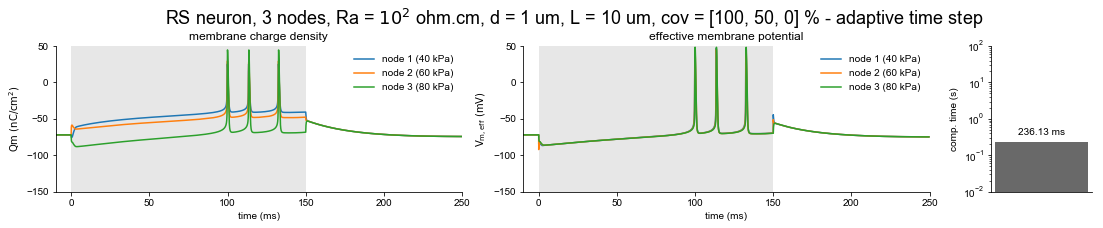

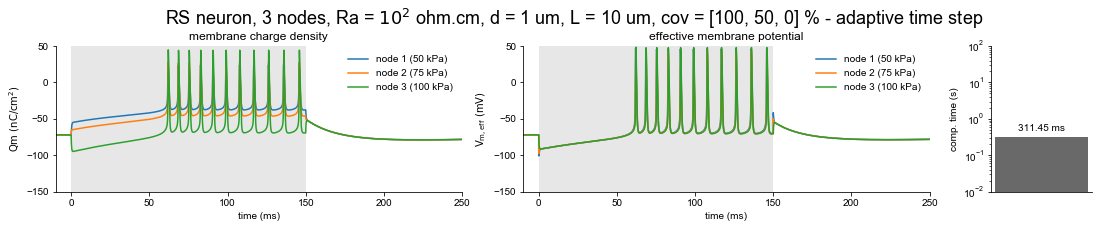

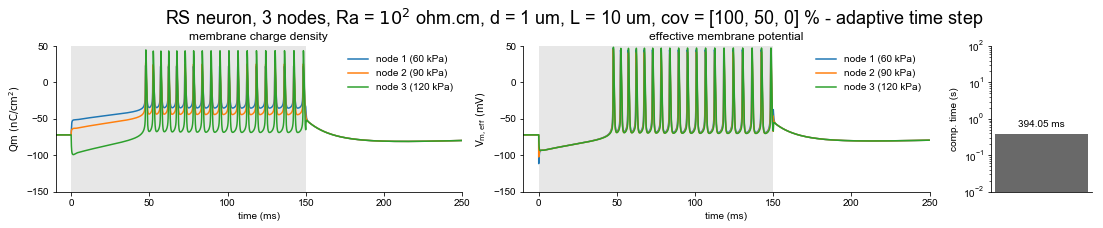

In [36]:
nnodes = 3
for Amax in np.linspace(80, 120, 3) * 1e3:
    fig = runPlotAStim(neuron, a, Fdrive, Ra, connector, d, L, np.linspace(Amax / 2, Amax, nnodes), tstim, toffset, PRF, DC, nnodes=nnodes, covs=np.linspace(1.0, 0, nnodes))

While all nodes stay "$V_{m,eff}$-locked", the evolution of charge density profiles (build-up and spike shape) becomes a more complex combination of membrane coverage and acoustic amplitude.